# **OpenCV Time**
OpenCV has an implementation of the Harris Corner Detector, let's experiment with this a bit.
Fun side note, the Harris Corner Detector makes use of the Sobel Operator!

In [23]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


In [24]:
im1 = imread('/content/the_3d_world/data/small/image_00.jpg')

In [25]:
im1.shape

(540, 960, 3)

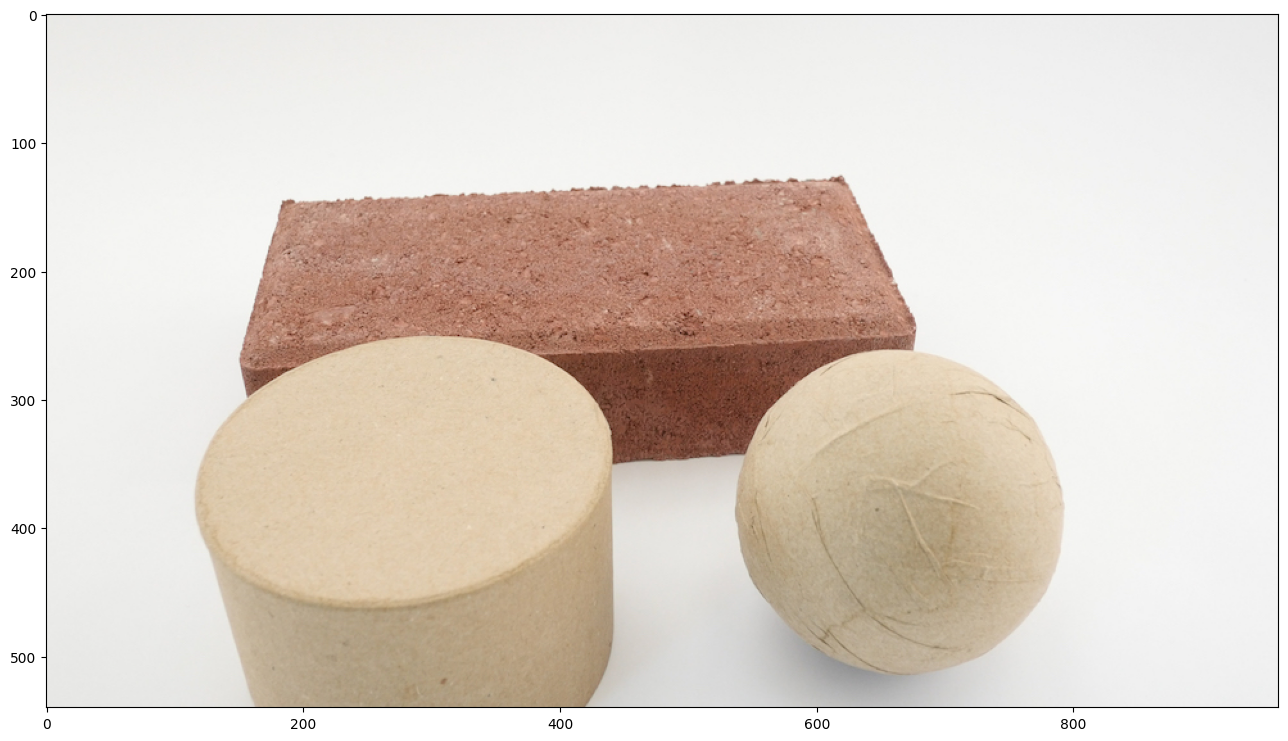

In [26]:
fig = figure(0, (18, 9))
imshow(im1)

In [27]:
gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)

In [28]:
def convert_to_grayscale(color_image):
    return np.mean(color_image, axis = 2)

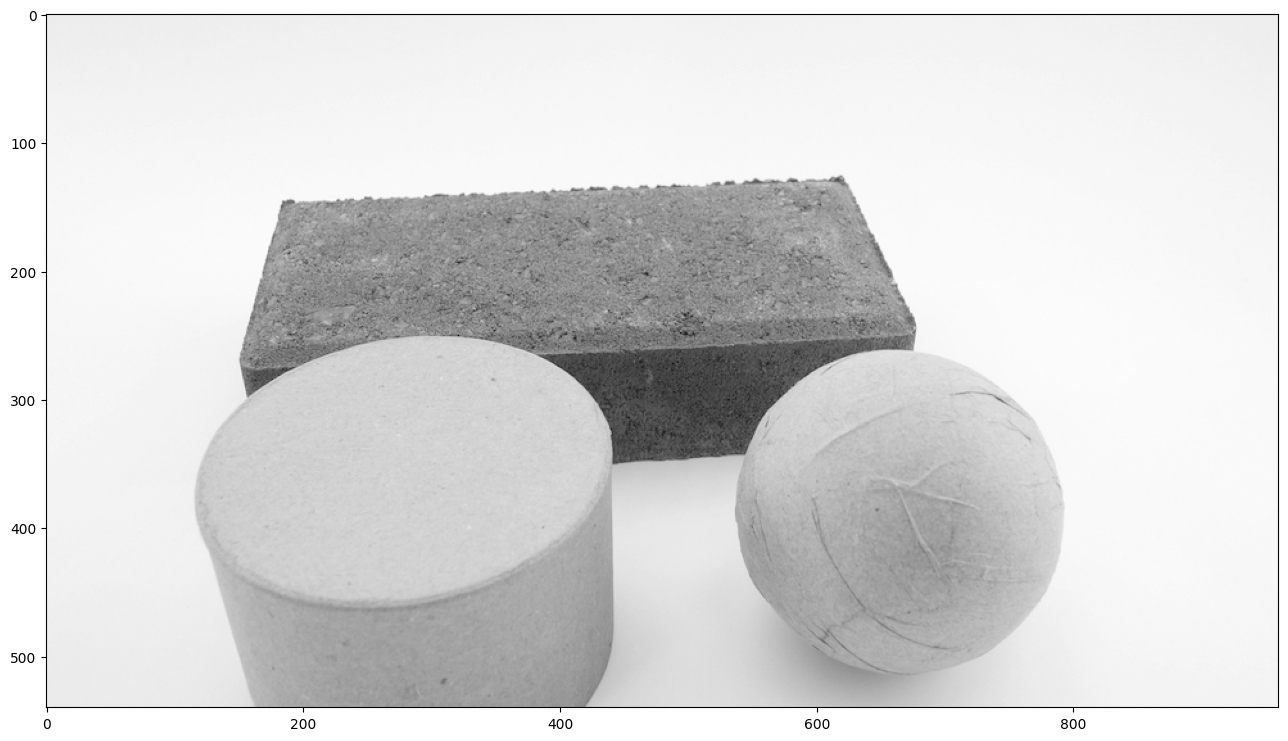

In [29]:
fig = figure(0, (18, 9))
imshow(gray_1, cmap = 'gray')

In [30]:
# Compute Harris Corners:
corners = cv2.cornerHarris(gray_1,
                     blockSize = 8,
                     ksize = 3,
                     k =  0.04)

In [31]:
corners.shape

(540, 960)

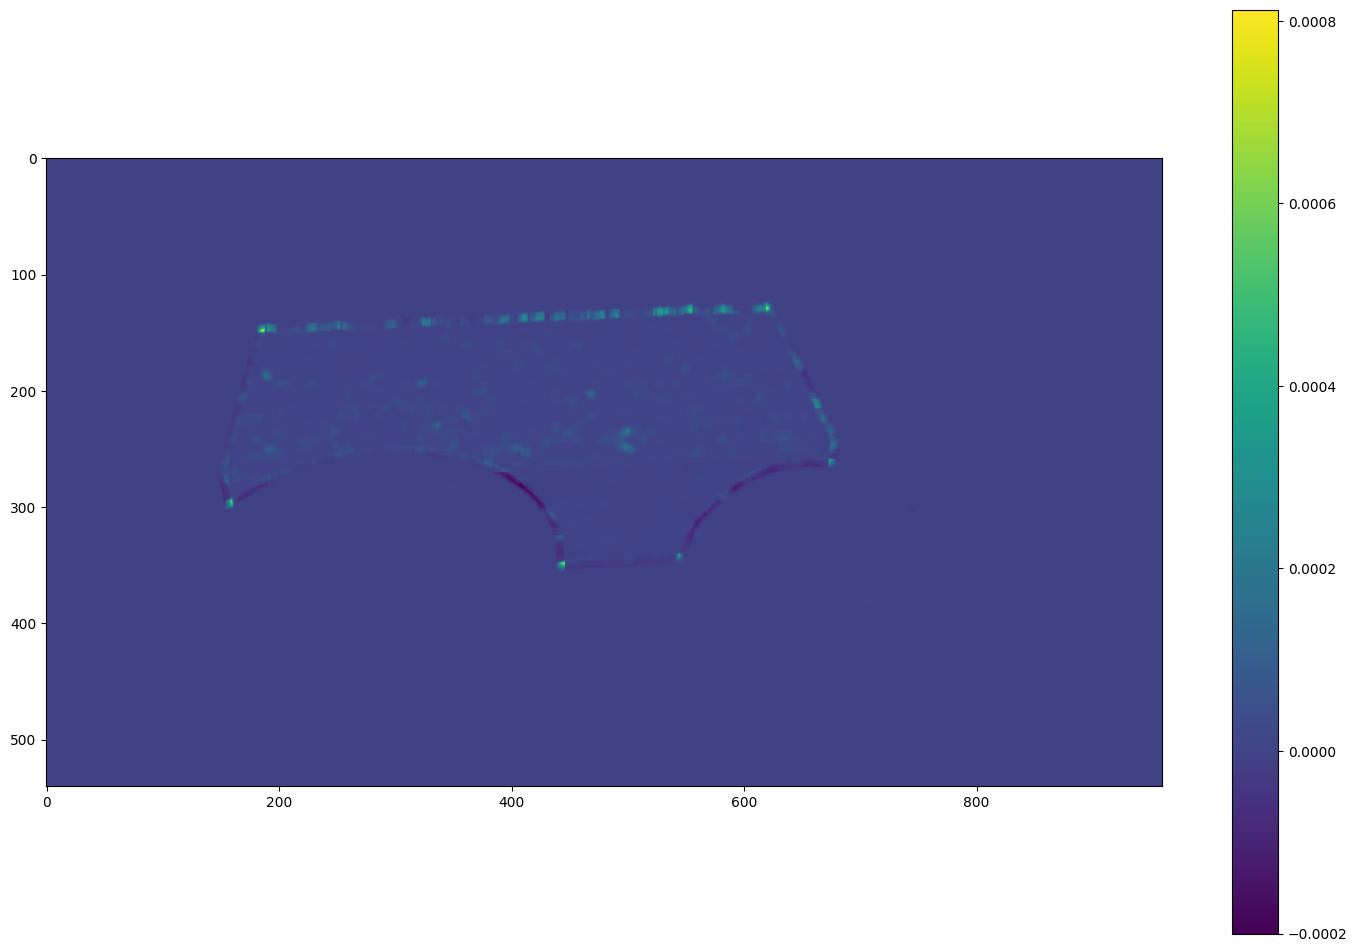

In [32]:
fig = figure(0, (18,12))
imshow(corners)
colorbar()

In [33]:
gray_1_blurred = cv2.GaussianBlur(gray_1, ksize = (11, 11), sigmaX = 3)

Text(0.5, 1.0, 'So Blurrrrry')

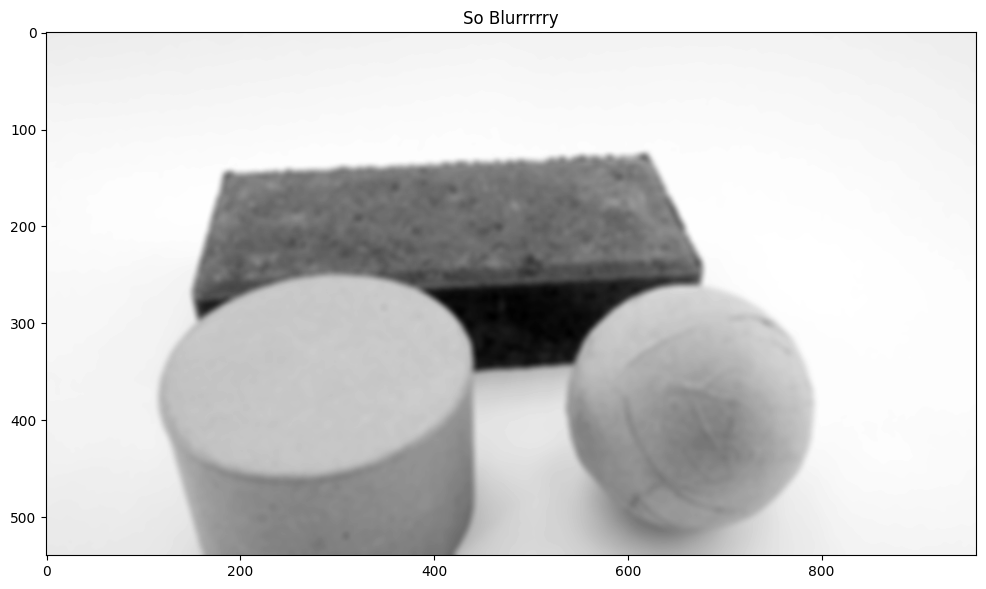

In [34]:
fig = figure(0, (12,9))
imshow(gray_1_blurred, cmap = 'gray')
title('So Blurrrrry')

In [35]:
corners = cv2.cornerHarris(gray_1_blurred,
                     blockSize = 8,
                     ksize = 3,
                     k =  0.04)

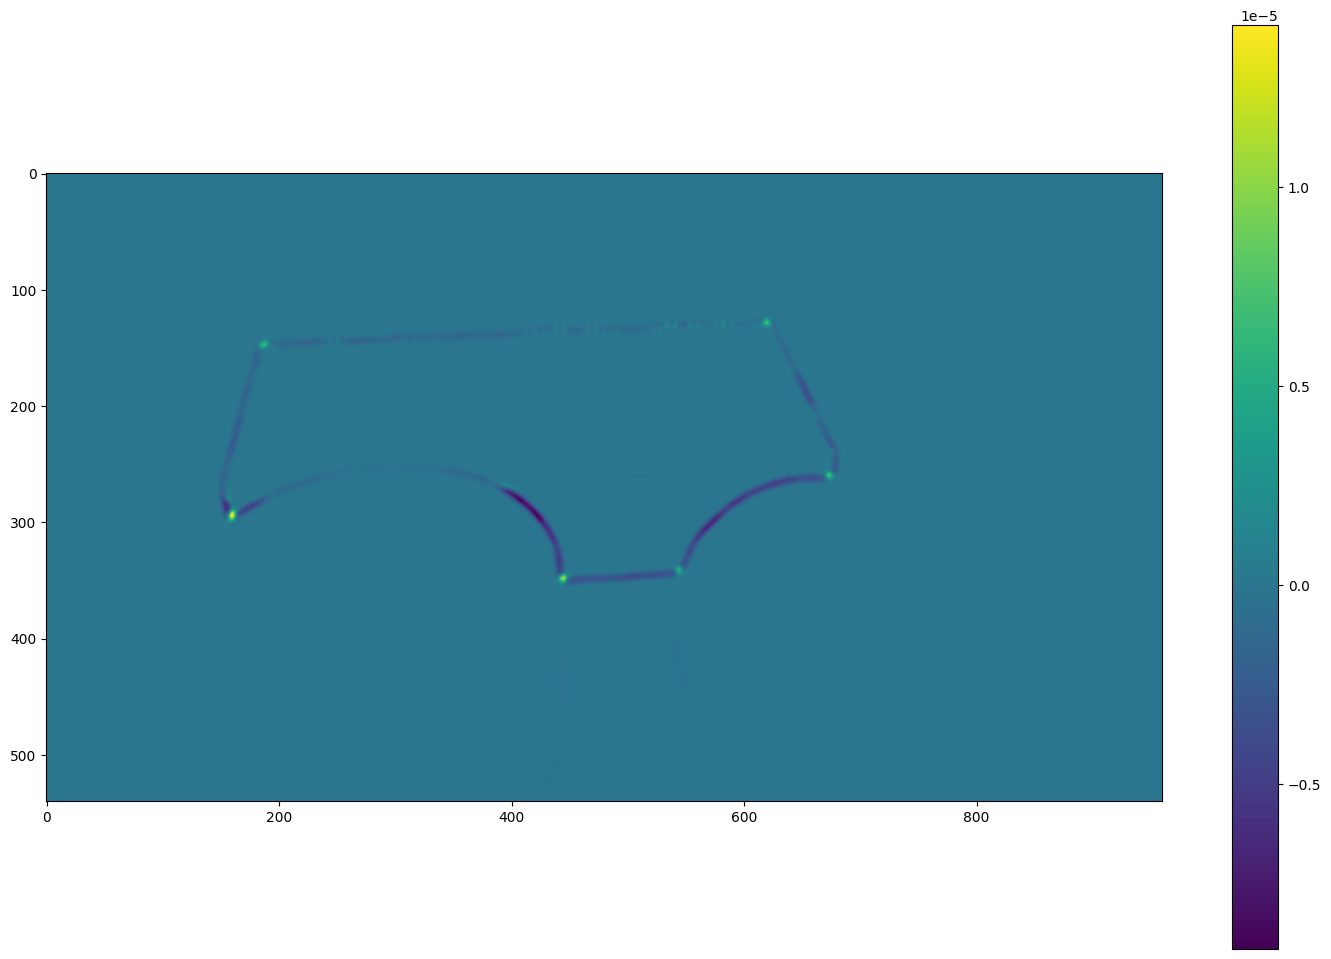

In [36]:
fig = figure(0, (18,12))
imshow(corners)
colorbar()

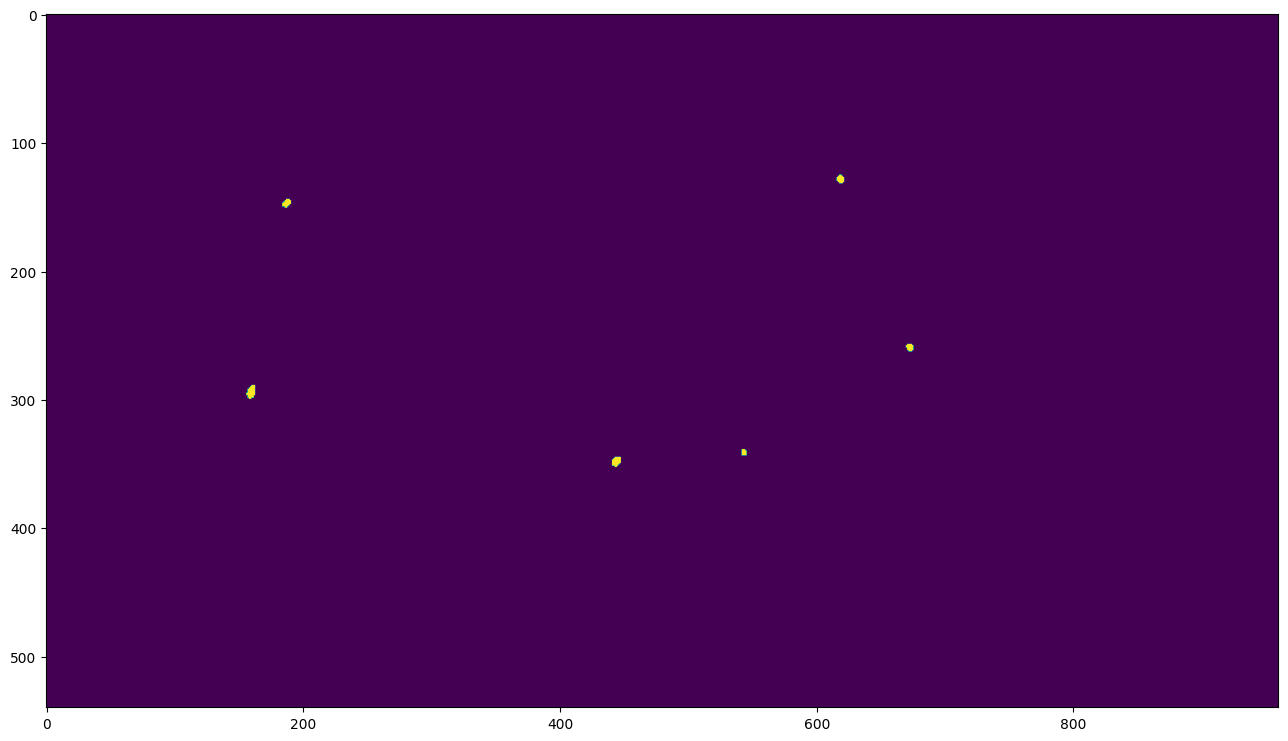

In [37]:
fig = figure(0, (18, 9))
threshold = 0.2
imshow(corners>threshold*corners.max())

In [38]:
corners = cv2.goodFeaturesToTrack(gray_1,
                                  maxCorners = 50,
                                  qualityLevel = 0.1,
                                  minDistance = 25)

In [39]:
corners.shape

(50, 1, 2)

In [40]:
corners

array([[[184., 146.]],

       [[442., 349.]],

       [[189., 186.]],

       [[157., 297.]],

       [[227., 144.]],

       [[662., 211.]],

       [[476., 134.]],

       [[325., 140.]],

       [[410., 136.]],

       [[468., 202.]],

       [[524., 131.]],

       [[584., 130.]],

       [[295., 141.]],

       [[378., 138.]],

       [[497., 236.]],

       [[552., 128.]],

       [[602., 148.]],

       [[321., 250.]],

       [[544., 342.]],

       [[405., 248.]],

       [[619., 126.]],

       [[675., 261.]],

       [[562., 249.]],

       [[379., 259.]],

       [[438., 136.]],

       [[321., 194.]],

       [[646., 177.]],

       [[360., 218.]],

       [[159., 268.]],

       [[349., 246.]],

       [[436., 232.]],

       [[180., 223.]],

       [[539., 192.]],

       [[632., 240.]],

       [[188., 249.]],

       [[604., 189.]],

       [[582., 289.]],

       [[360., 162.]],

       [[267., 220.]],

       [[500., 192.]],

       [[299., 207.]],

       [[647., 3

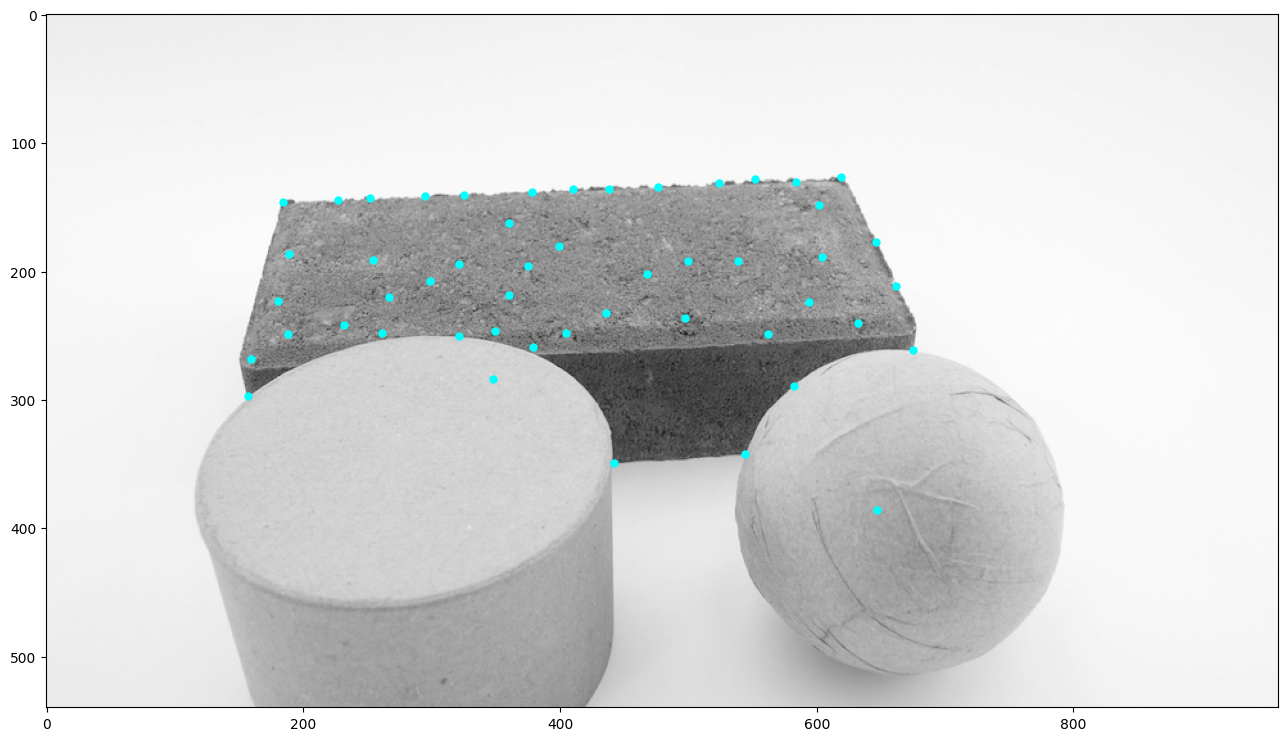

In [41]:
fig = figure(0, (18, 9))
imshow(gray_1, cmap = 'gray')
scatter(corners[:, 0, 0], corners[:,0,1], c = [[0, 1, 1]], s = 25)

In [42]:
im2 = imread('/content/the_3d_world/data/small/image_03.jpg')
gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

In [43]:
images_together = np.hstack((gray_1, gray_2))

<ipython-input-44-ca68bd73cf6e>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter(corners[:, 0, 0], corners[:,0,1], c = (0, 1, 1), s = 25)


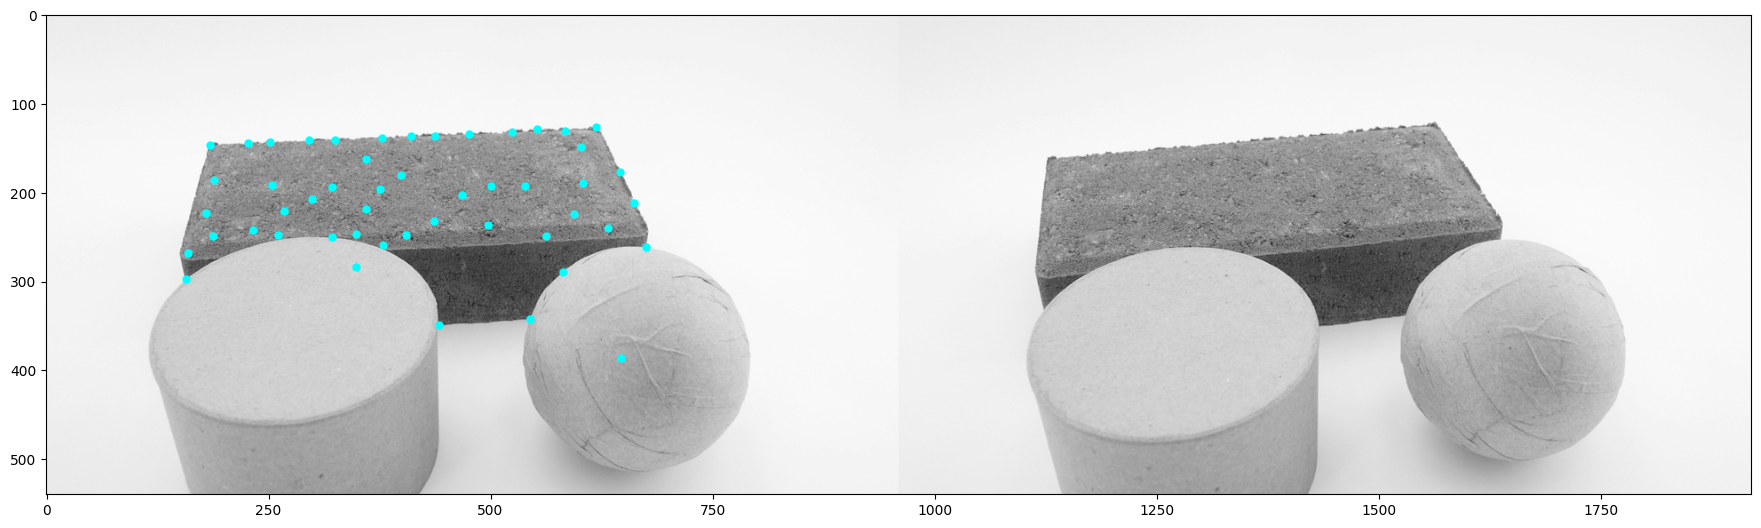

In [44]:
fig = figure(0, (22, 9))
imshow(images_together, cmap = 'gray')
scatter(corners[:, 0, 0], corners[:,0,1], c = (0, 1, 1), s = 25)

In [45]:
nextPts, status, err = cv2.calcOpticalFlowPyrLK(gray_1, gray_2, corners, None)

In [46]:
nextPts

array([[[168.31013, 161.65596]],

       [[473.3532 , 349.55093]],

       [[180.92204, 202.42938]],

       [[163.26546, 328.5555 ]],

       [[212.17638, 157.78586]],

       [[658.9936 , 203.43085]],

       [[463.253  , 136.03535]],

       [[312.0527 , 148.98965]],

       [[397.68292, 141.04515]],

       [[468.01648, 204.52953]],

       [[510.66663, 130.75981]],

       [[569.77893, 127.23373]],

       [[281.55066, 151.38199]],

       [[365.67813, 144.51346]],

       [[502.62897, 237.09756]],

       [[538.365  , 126.61617]],

       [[591.0424 , 144.39557]],

       [[352.16638, 261.46432]],

       [[569.6636 , 338.32047]],

       [[423.2977 , 255.1962 ]],

       [[603.99756, 121.7436 ]],

       [[677.1991 , 253.24219]],

       [[578.0598 , 245.59973]],

       [[395.1923 , 265.86996]],

       [[425.63162, 139.8616 ]],

       [[318.05948, 203.82611]],

       [[639.01776, 171.7227 ]],

       [[362.40375, 226.36456]],

       [[162.2009 , 288.0358 ]],

       [[362.8

In [47]:
nextPts.shape

(50, 1, 2)

In [48]:
nextPts = nextPts[status[:,0]==1, :, :]
corners_filtered = corners[status[:,0]==1, :, :]

In [49]:
nextPts.shape

(50, 1, 2)

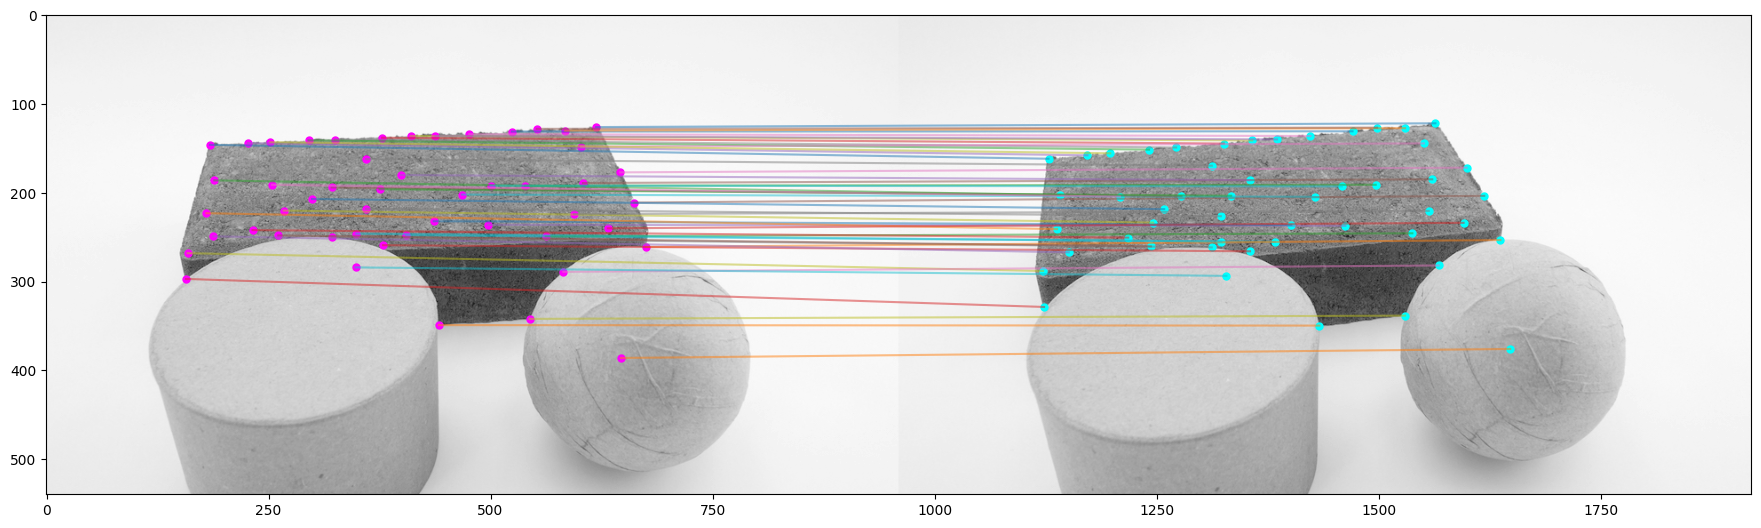

In [50]:
fig = figure(0, (22, 9))
imshow(images_together, cmap = 'gray')

for i in range(nextPts.shape[0]):
    plot([corners_filtered[i, 0, 0], nextPts[i, 0, 0] + gray_1.shape[1]],
         [corners_filtered[i, 0, 1], nextPts[i, 0, 1]], alpha = 0.5)

scatter(corners_filtered[:, 0, 0], corners_filtered[:,0,1], c = [[1, 0, 1]], s = 25)
scatter(nextPts[:, 0, 0] + gray_1.shape[1], nextPts[:,0,1], c = [[0, 1, 1]], s = 25)

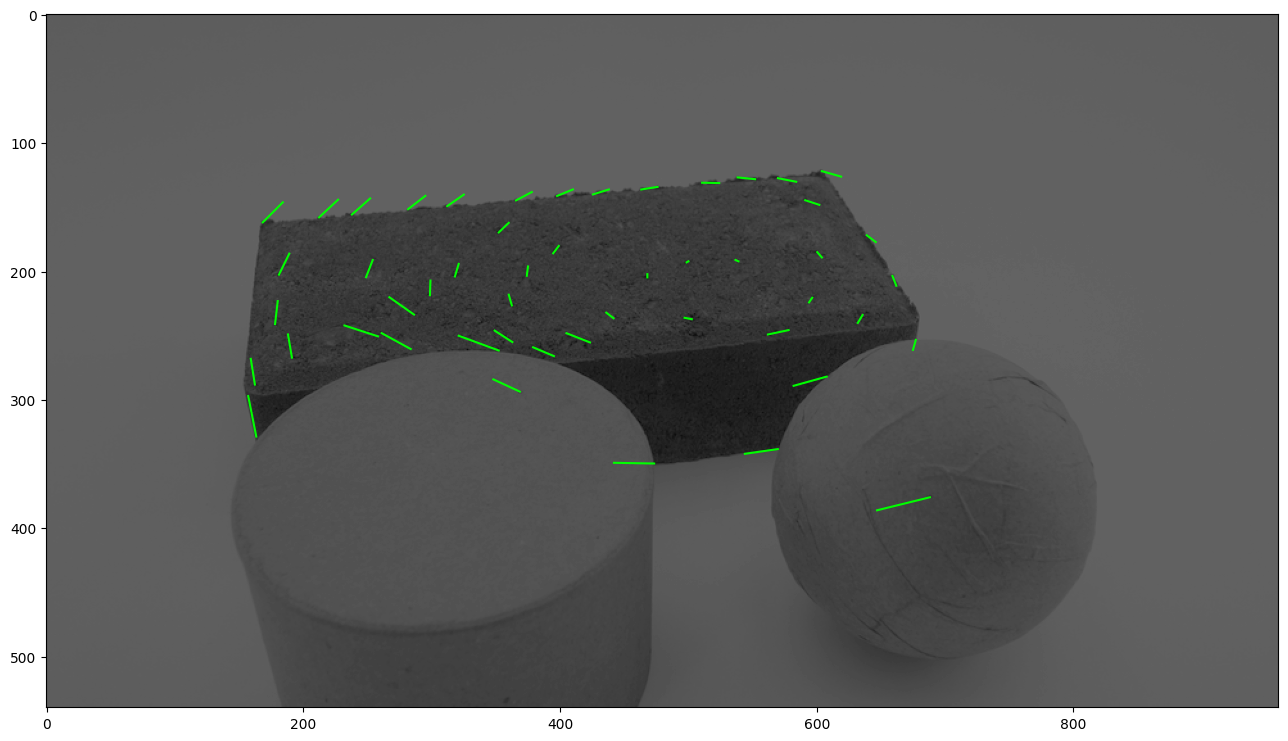

In [51]:
fig = figure(0, (22, 9))
imshow(gray_2*0.4, cmap = 'gray', vmax = 255, vmin = 0) #Darken image to make it easier to see flow lines

for i in range(nextPts.shape[0]):
    plot([corners_filtered[i, 0, 0], nextPts[i, 0, 0]],
         [corners_filtered[i, 0, 1], nextPts[i, 0, 1]], alpha = 1.0, c = (0, 1, 0))

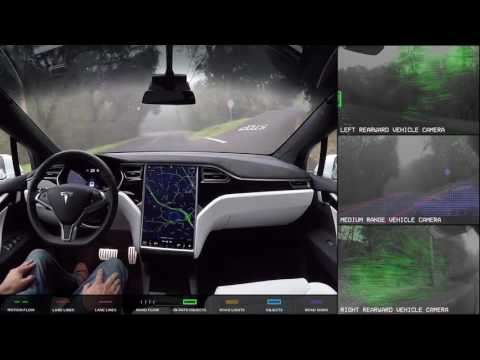

In [52]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('VG68SKoG7vE', width = 960, height = 540)

## **When might the Lucas Kanade method fail?**

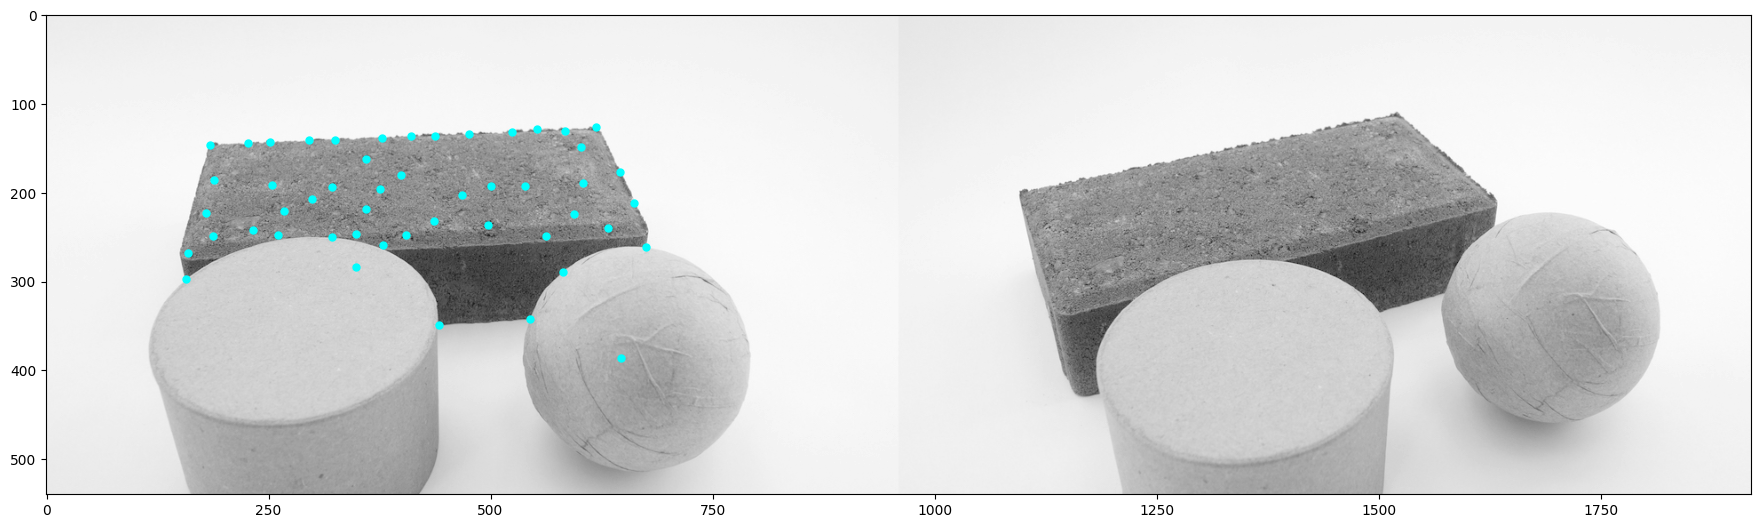

In [53]:
im2 = imread('/content/the_3d_world/data/small/image_10.jpg')
gray_2 = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

images_together = np.hstack((gray_1, gray_2))

fig = figure(0, (22, 9))
imshow(images_together, cmap = 'gray')
scatter(corners[:, 0, 0], corners[:,0,1], c = [[0, 1, 1]], s = 25)

In [54]:
nextPts, status, err = cv2.calcOpticalFlowPyrLK(gray_1, gray_2, corners, None)

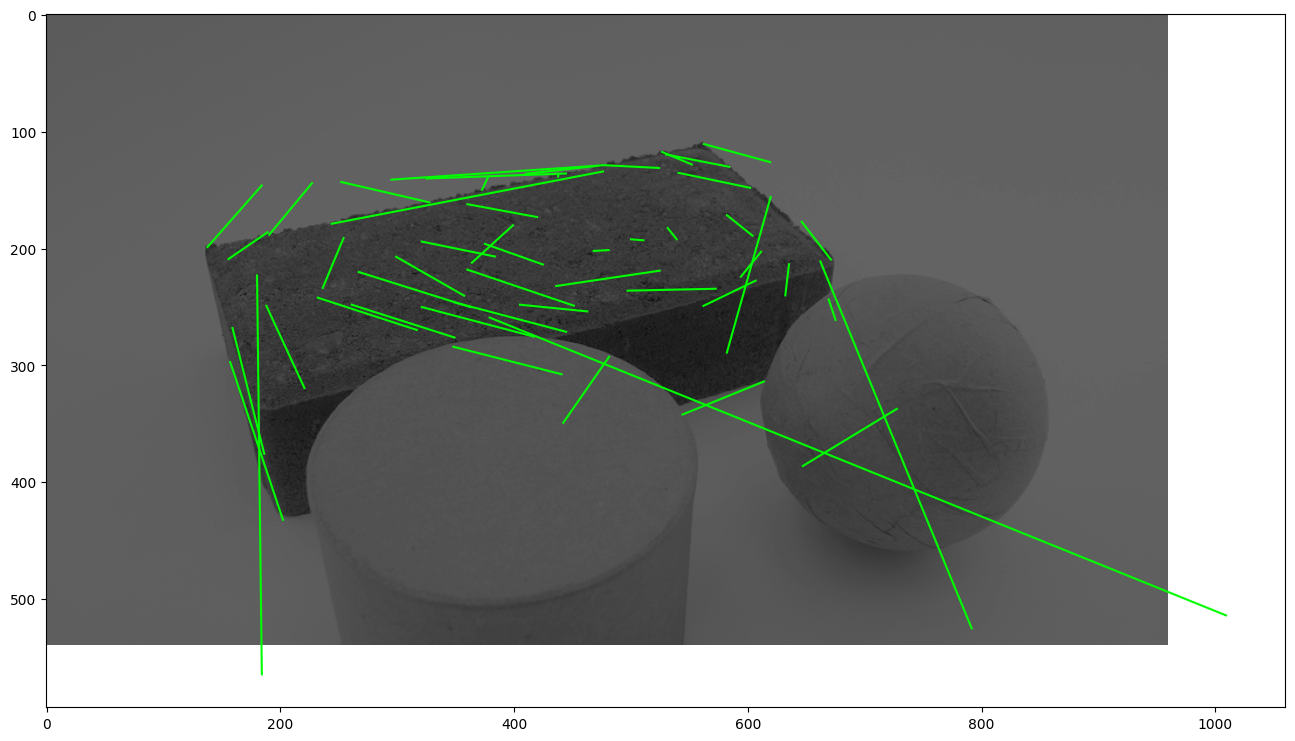

In [55]:
fig = figure(0, (22, 9))
imshow(gray_2*0.4, cmap = 'gray', vmax = 255, vmin = 0) #Darken image to make it easier to see flow lines

for i in range(nextPts.shape[0]):
    plot([corners[i, 0, 0], nextPts[i, 0, 0]],
         [corners[i, 0, 1], nextPts[i, 0, 1]], alpha = 1.0, c = (0, 1, 0))

# Why is Lucas Kanade struggling here? Ideas?
# Here's our performance at different step sizes (step size = how far apart the frames we're comparing are)
As we saw above, when our images change too much, the Lucas Kanade method struggles. This happends for a couple reasons.
LK searches in the neighborhood of our old interest points, when our new points move to far from our old, it can be difficult for KL to converge.
As we can see above, when our scene is viewed from a different angle, the appearance of our interest points changes. The appearance of our interest points can also change as a result of other factors (changes in lighting, occlusions, changes in scale...). This change in appearance can make interest points hard to track between images.
A large body of research is focused on solving these problems - the most well known solution is probably SIFT (Scale Invariant Feature Transform).

David Lowe's SIFT algorithm combines a number of clever ideas and lots of experimentation to reliably detect and match keypoints between images.
One interesting idea used in SIFT is Scale Space.
By taking the difference of more and more blurred versions of the original image, it's possible to detect interest points at multiple scales.
This allows the intrest point detector to be scale invariant (this is the SI in SIFT).
Again, we don't have time for a deep dive here, but David Lowe's papers present a very clear desciption of SIFT.

Another key idea from SIFT is the use of robust interest point descriptors.

As shown in David Lowe's figure above, the SIFT descriptor uses orientation histograms over image patches.
These histograms are also made direction invariant by computing a dominant direction and shifting orientation histograms to point in the same direction
Why might a histogram of orientations be more robust to lighting/scale/directional changes than a simple pixel to pixel comparison?

The SIFT algorithm is patented.
This means that you can't use it for commercial purposes.
SIFT was part of opencv 2, but not opencv 3 (although if you build from source, you can get it as part of contrib).
Finally, I did a little digging, and I belive that the SIFT patent will expire in March 2019.
So, if we really wanted to use SIFT, we could use OpenCV 2, build opencv 3 from source with the contrib module, find another implementation, or impelement it ourselves.
However, there are some very good open source alternatives, we'll look at one called ORB.

ORB (Oriented Fast and Rotated Brief) is a nice open source feature detector and descriptor out of Willow Garage.
ORB achieves similar performance to SIFT (although not quite as good in my experience), but is 2 orders of magnitude faster
ORB makes use of and extends some previous work, specifically FAST interest point detection, and BRIEF feature descriptors.
Fun side note - the final author on the ORB paper, Gary Bradsky, was a member of the Stanford wining Darpa grand challenge team, and wrote the book on opencv.
Let's check out ORB!

In [56]:
ORB = cv2.ORB_create(nfeatures = 2000)

kpts1, des1 = ORB.detectAndCompute(gray_1, None)
kpts2, des2 = ORB.detectAndCompute(gray_2, None)

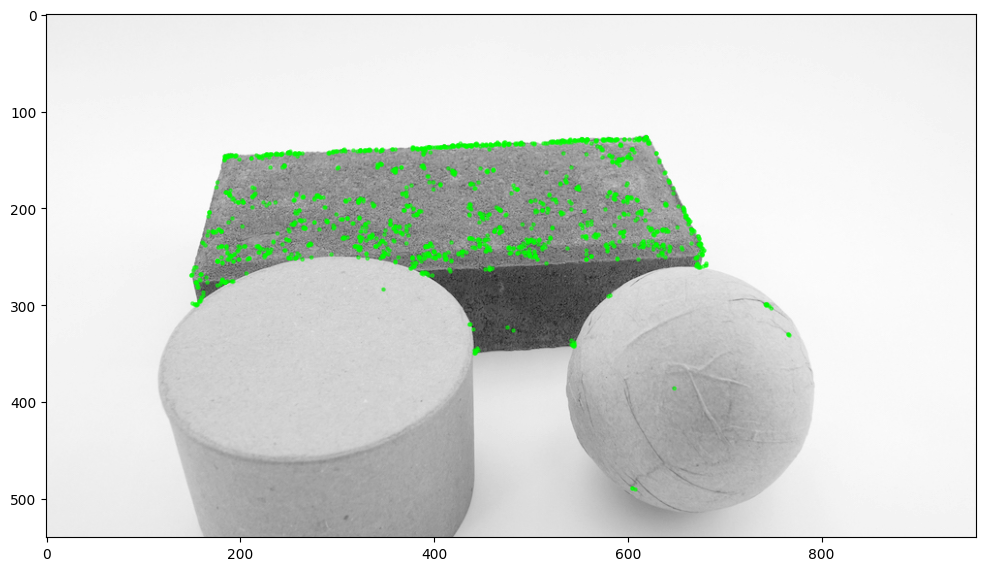

In [57]:
fig = figure(0, (12,12))
imshow(gray_1, cmap = 'gray')
for kpt in kpts1:
    scatter(kpt.pt[0], kpt.pt[1], c = [[0, 1, 0]], s = 5, alpha = 0.5)

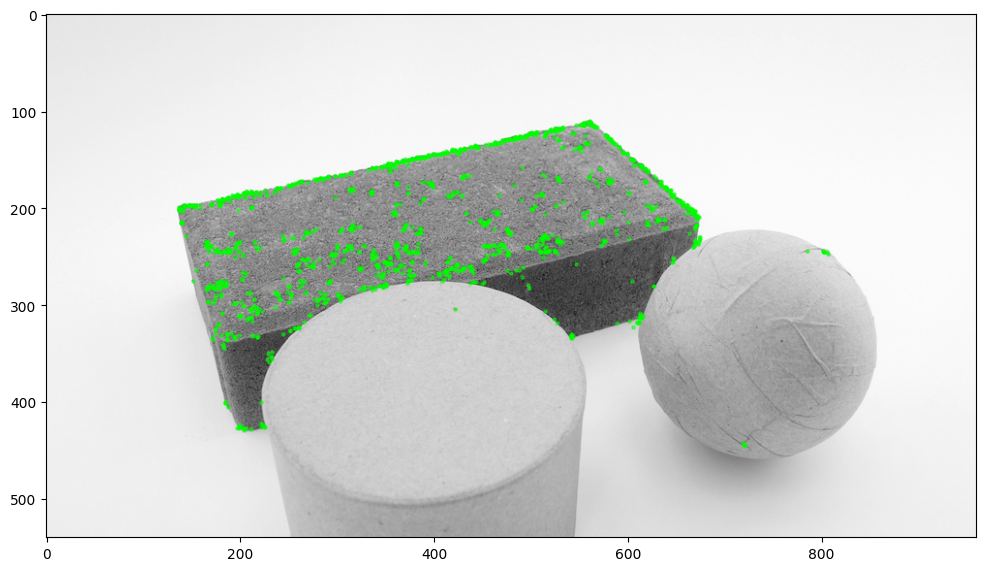

In [58]:
fig = figure(0, (12,12))
imshow(gray_2, cmap = 'gray')
for kpt in kpts2:
    scatter(kpt.pt[0], kpt.pt[1], c = [[0, 1, 0]], s = 5, alpha = 0.5)

Notice that our ORB features pick up on the brick much more than the ball and cylinder.
This is due to the texture of the brick.
OpenCV's orb class does not have non maximum supression built in, but there may be other ways to better distribute our keypoints.
For now, we won't worry about this too much.

# **The Descriptors**
In addition to detecting interest points, SIFT and ORB also compute robust interest points descriptors.

In [59]:
des1.shape

(1466, 32)

Why is the the dimnsion of our descriptors?

Just for fun, let's visualize the descriptors for a couple keypoints:

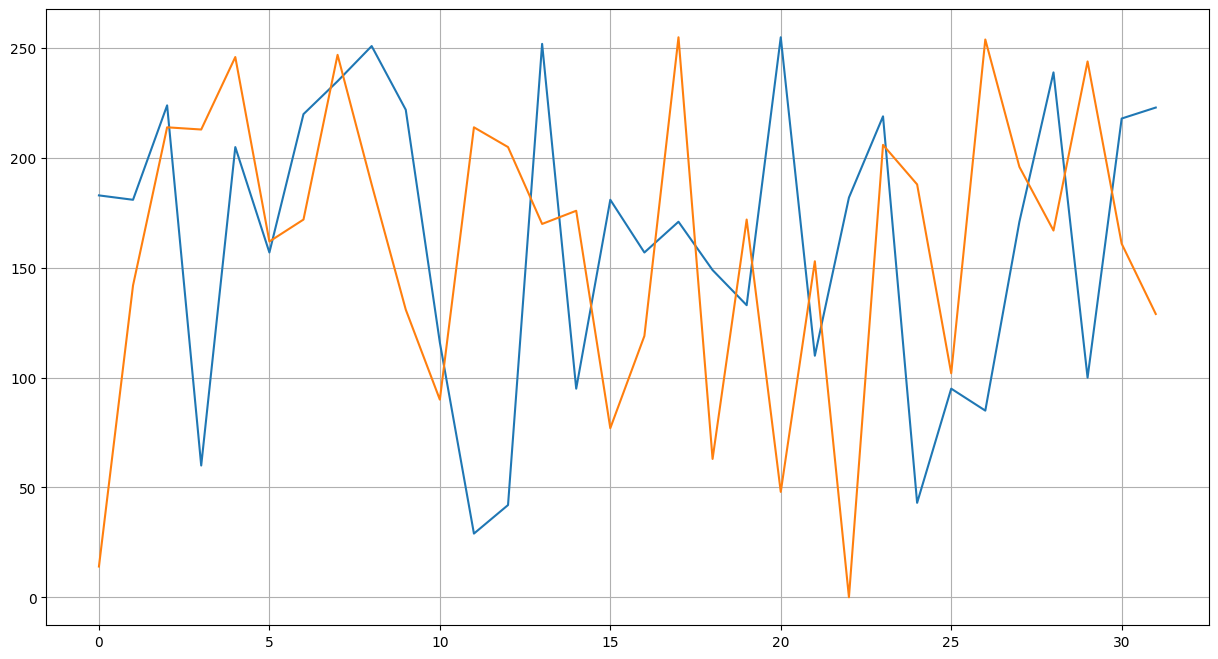

In [60]:
fig = figure(0, (15,8))
plot(des1[0, :].T);
grid(1)
plot(des1[1, :].T);

The idea is, that a keypoints, even viewed under different lighting of from different perspectives, our descriptor should remain relatively constant.
Our job then is to match descriptors from our first image to descriptors in our second image.
Comparing all keypoints scales as
, where
 is the number of points, so as you can imagine conducting all these comparisons could be pretty slow.
OpenCV has some nice exact/brute force matchers, and some approximate matching methods when we need more speed, we'll use a brute force method here that compares all keypoints.

In [61]:
#create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

In [62]:
#Perform Matching, return 2 closest matches:
matches = bf.knnMatch(des1, des2, k=2)

In [63]:
len(matches)

1466

Alright, so we've ended up with a good number of matches.
Now, to improve the qaulity of these matches, we'll borrow another idea from David Lowe
It's possible for 2 seperate interest points in one image to be very similar to a single interest point in another
One way to mitigate thie problem is the ratio test
For each keypoint in one image, we'll compute the 2 nearest in the other image
If the nearest descriptor is not much closer than the second nearest descriptor, we'll throw it out:

In [64]:
# Apply lowes' ratio test
matches_cleaned = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        matches_cleaned.append(m)

In [65]:
len(matches)

1466

In [66]:
len(matches_cleaned)

99

In [67]:
matches_cleaned = sorted(matches_cleaned, key = lambda x:x.distance)

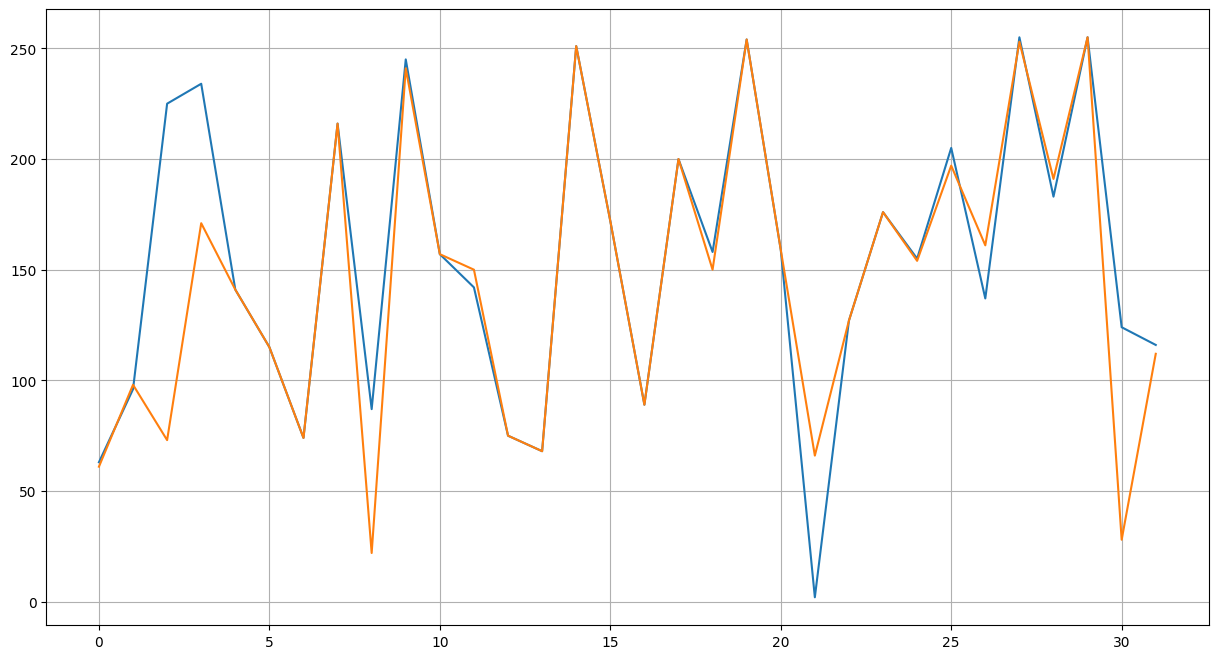

In [68]:
fig = figure(0, (15,8))
plot(des2[matches_cleaned[0].trainIdx, :].T);
grid(1)
plot(des1[matches_cleaned[0].queryIdx, :].T);

In [69]:
index = 10

kpt = kpts1[matches_cleaned[index].queryIdx]
coords_1 = np.array(kpt.pt).astype('int')

kpt = kpts2[matches_cleaned[index].trainIdx]
coords_2 = np.array(kpt.pt).astype('int')

In [70]:
print(coords_1, coords_2)

[634 246] [638 219]


In [71]:
s = 10 #half neighborhood size
neighborhood_one = gray_1[coords_1[1]-s:coords_1[1]+s, coords_1[0]-s:coords_1[0]+s]
neighborhood_two = gray_2[coords_2[1]-s:coords_2[1]+s, coords_2[0]-s:coords_2[0]+s]

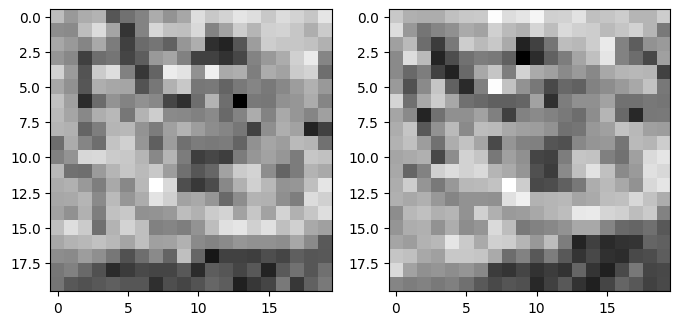

In [72]:
fig = figure(0, (8, 16))
fig.add_subplot(121)
imshow(neighborhood_one, cmap = 'gray')

fig.add_subplot(122)
imshow(neighborhood_two, cmap = 'gray')

In [73]:
matching_keypoints_1 = []
matching_keypoints_2 = []

for match in matches_cleaned:
    matching_keypoints_1.append(kpts1[match.queryIdx])
    matching_keypoints_2.append(kpts2[match.trainIdx])

In [74]:
len(matching_keypoints_1)

99

# **And Finally, Visualize**

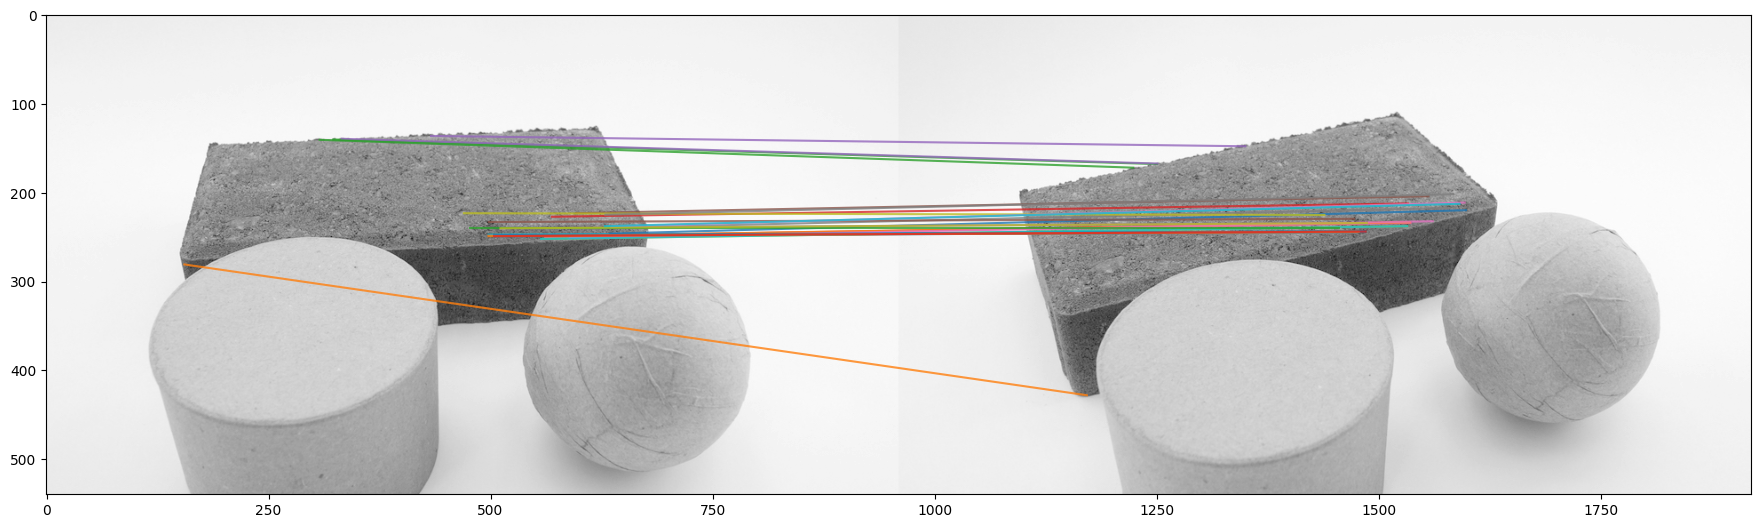

In [75]:
num_matches_to_show = 30 #Just show the first/best n matches here

fig = figure(0, (22, 9))
imshow(images_together, cmap = 'gray')

for i in range(len(matching_keypoints_1[:num_matches_to_show])):
    plot([matching_keypoints_1[i].pt[0], matching_keypoints_2[i].pt[0]+gray_1.shape[1]],
         [matching_keypoints_1[i].pt[1], matching_keypoints_2[i].pt[1]], alpha = 0.8)

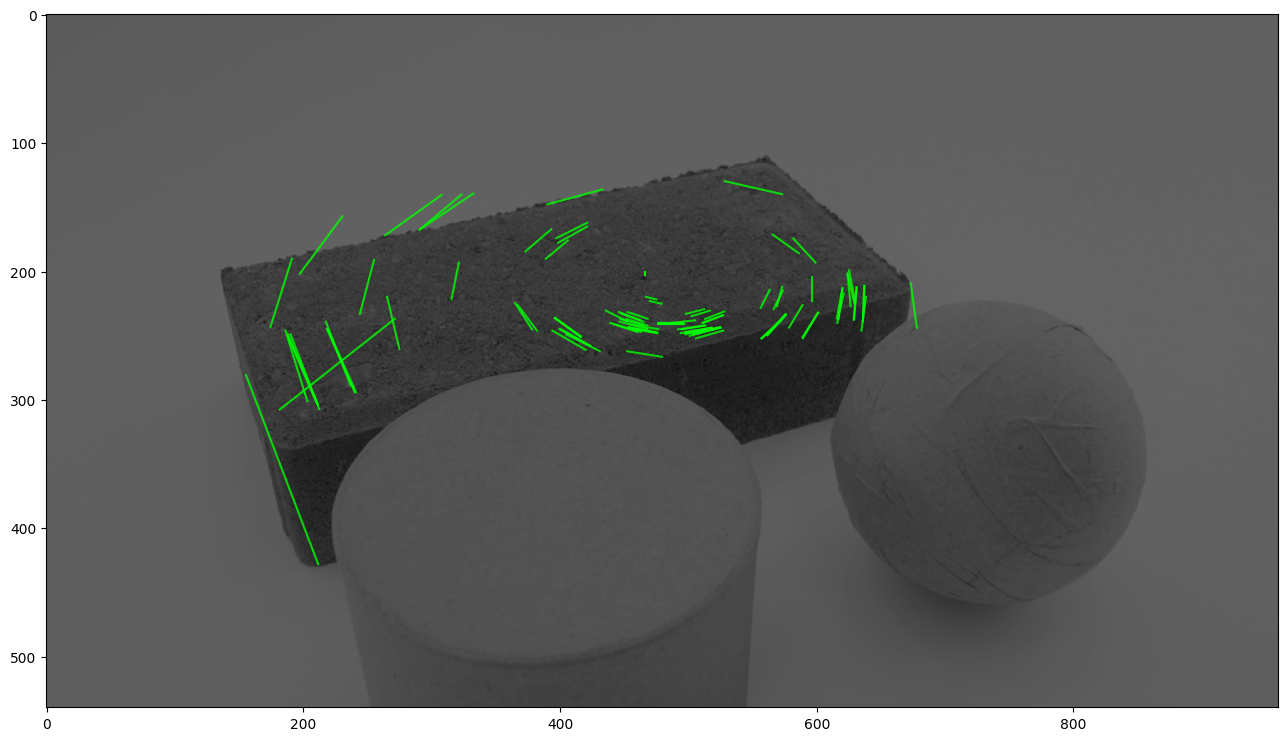

In [76]:
fig = figure(0, (22, 9))
imshow(gray_2*0.4, cmap = 'gray', vmax = 255, vmin = 0) #Darken image to make it easier to see flow lines

for i in range(len(matching_keypoints_1)):
    plot([matching_keypoints_1[i].pt[0], matching_keypoints_2[i].pt[0]],
         [matching_keypoints_1[i].pt[1], matching_keypoints_2[i].pt[1]], alpha = 0.8, c = (0, 1, 0))

Pretty good matching for images that far apart, right?
Now, notice that we are making some errors
In our final lecture of this series, we'll discuss image transformation and RANSAC - and talk about a cool way to reject more incorrect matches by fitting a transformation model between frames.

Super point is a bit noisy on our example here, we'll cover some methods to reject noisy matches in the transformations + RANSAC lecture.
Notice how well tracked many of the interest points are!
What's really remarkable is that SuperPoint was learned from data, and does not rely on a ton of manually tuned hueristics.